# Quantum Software Basics

### Hadamard Gate
Creates the uniform superposition

In [6]:
%pip install qiskit qiskit-aer
%pip install matplotlib
%pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


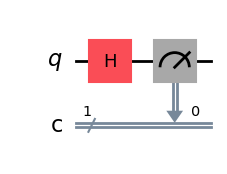

In [7]:
from qiskit import QuantumCircuit #the main class used to create quantum circuits       
from qiskit_aer import AerSimulator #imports the local quantum simulator
from qiskit.visualization import plot_histogram #used to visualize the results of quantum computations
from qiskit import transpile #Used to compile the circuit to the simulator backend
#Imports

# Create a quantum circuit with: 1 quantum bit (qubit) and 1 classical bit (to store measurement result)
qc = QuantumCircuit(1, 1)
# Apply Hadamard gate to qubit 0
qc.h(0)
# Measure qubit 0 and store result in classical bit 0
qc.measure(0, 0)
# Create simulator instance, this acts as the "virtual quantum computer"
sim = AerSimulator()
# Compile the circuit to match the simulator's gate set
compiled = transpile(qc, sim)
# Run the circuit, performing the quantum simulation matematically
result = sim.run(compiled).result()
# Get measurement counts
counts = result.get_counts()

# Draw the circuit visually
qc.draw('mpl')

### Walsh–Hadamard Transform (H ⊗ H ⊗ H) - creates an uniform superposition of all the x possible states

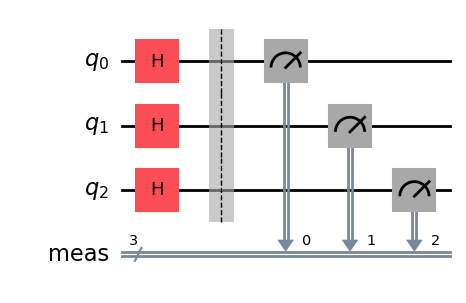

In [8]:
# Create a circuit with 3 qubits
qc = QuantumCircuit(3)
# Apply Hadamard gate to all qubits -- This creates a uniform superposition over all 8 basis states
qc.h([0, 1, 2])
# Measure all qubits and store results in classical bits
qc.measure_all()
# Draw it visually
qc.draw('mpl')

### Pauli Gates (X, Y, Z) - the fundamental single-qubit rotation gates
#### PauliPauli-X Gate (Quantum NOT) - the quantum equivalent of a classical NOT gate

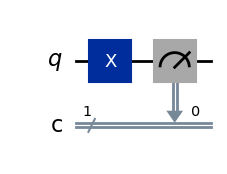

In [9]:
qc = QuantumCircuit(1, 1)

# Apply Pauli-X gate
qc.x(0)

# Measure
qc.measure(0, 0)

qc.draw('mpl')

#### Pauli-Z Gate (Phase Flip)

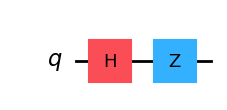

In [10]:
qc = QuantumCircuit(1)

# First create superposition
qc.h(0)

# Apply Pauli-Z
qc.z(0)

qc.draw('mpl')

#### Pauli-Y Gate

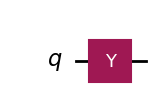

In [11]:
qc = QuantumCircuit(1)

qc.y(0)

qc.draw('mpl')

### Oracle Example (Marking |11⟩) - Everything below remains exactly the same as before

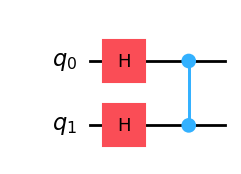

In [12]:
qc = QuantumCircuit(2)

qc.h([0, 1])
qc.cz(0, 1)

qc.draw('mpl')

### Diffusion Operator - reflects all amplitudes around their average, increasing the marked state's amplitude and decreasing the others

{'11': 1024}


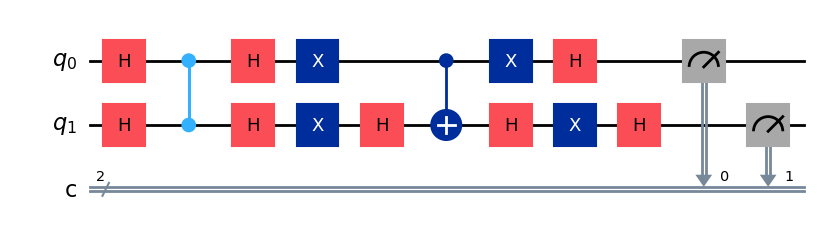

In [21]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

def diffusion_operator(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

n = 2

grover = QuantumCircuit(n, n)

# Step 1: Superposition
grover.h(range(n))

# Step 2: Oracle (mark |11>)
grover.cz(0,1)

# Step 3: Apply diffusion
grover.compose(diffusion_operator(n), inplace=True)

# Step 4: Measure
grover.measure(range(n), range(n))

# Run
sim = AerSimulator()
compiled = transpile(grover, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print(counts)
grover.draw('mpl')

### Full Grover Iteration

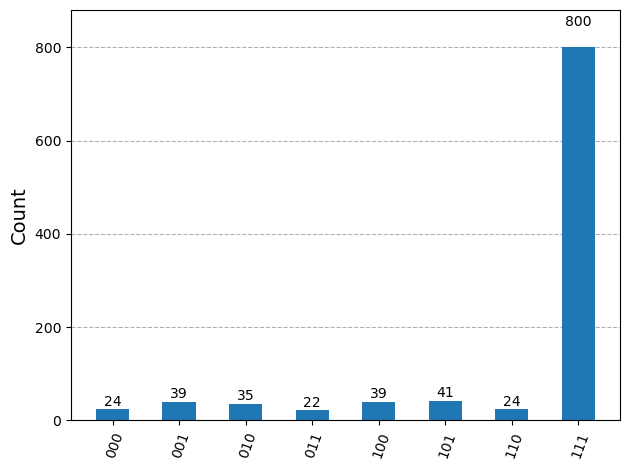

In [22]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import numpy as np

# Number of qubits
n = 3  

# Create circuit with n qubits and n classical bits
grover = QuantumCircuit(n, n)

# Step 1: Create uniform superposition
grover.h(range(n))

# Step 2: Oracle
# We mark |111⟩ using multi-controlled Z logic

grover.h(n-1)                      # change basis
grover.mcx([0,1], 2)               # multi-controlled X
grover.h(n-1)                      # restore basis

# Step 3: Diffusion operator
grover.compose(diffusion_operator(n), inplace=True)

# Step 4: Measure
grover.measure(range(n), range(n))

# Draw circuit
grover.draw('mpl')

sim = AerSimulator()
compiled = transpile(grover, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)